# Package `import`s

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style


style.use('seaborn')

# Data Collection - `iris` (online)

In [2]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.shape

(150, 5)

Clearly it can be see that the dataset has `150` rows and `5` columns.

# Exploratory Data Analysis

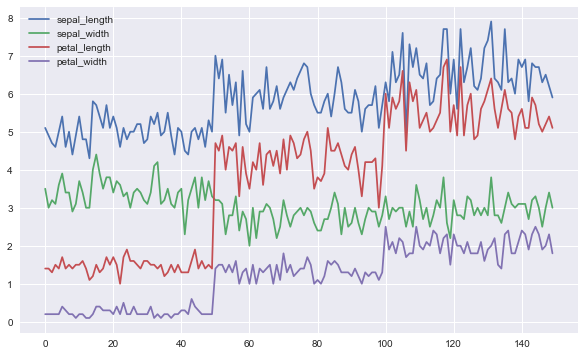

In [5]:
iris_df.plot(figsize=(10, 6))
plt.show()

### Check for `NaN` values

In [6]:
iris_df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

### Categorical data (`pie`)

In [7]:
species_df = iris_df['species'].value_counts().to_frame()

In [8]:
species_df

,species
setosa,50
virginica,50
versicolor,50


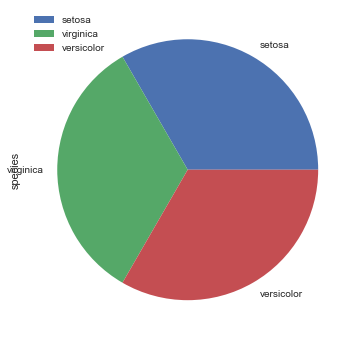

In [9]:
species_df.plot(kind='pie', figsize=(10, 6), subplots=True)
plt.show()

### Scatter plot

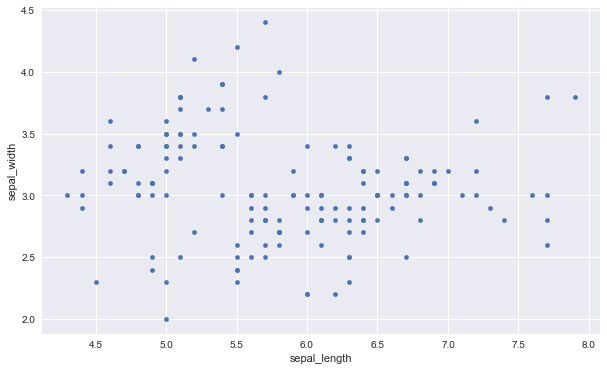

In [10]:
iris_df.plot(kind='scatter', x='sepal_length', y='sepal_width', figsize=(10, 6))
plt.show()

### Scatter plot according to `species`

In [11]:
list(species_df.index)

['setosa', 'virginica', 'versicolor']

In [12]:
setosa_df, versicolor_df, virginica_df = [iris_df[iris_df['species'] == i] for i in ['setosa', 'versicolor', 'virginica']]

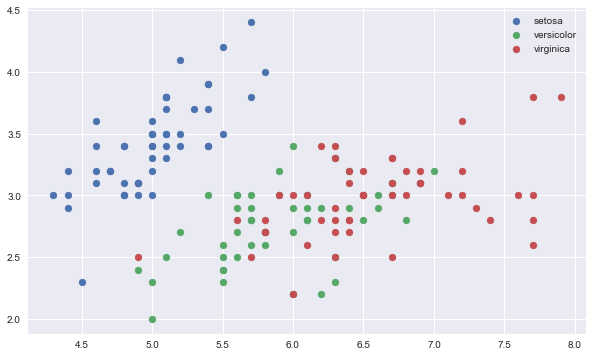

In [13]:
plt.figure(figsize=(10, 6))

for i in [setosa_df, versicolor_df, virginica_df]:
    plt.scatter(i['sepal_length'], i['sepal_width'], label=i['species'].iloc[0])

plt.legend()
plt.show()

### Pair plots

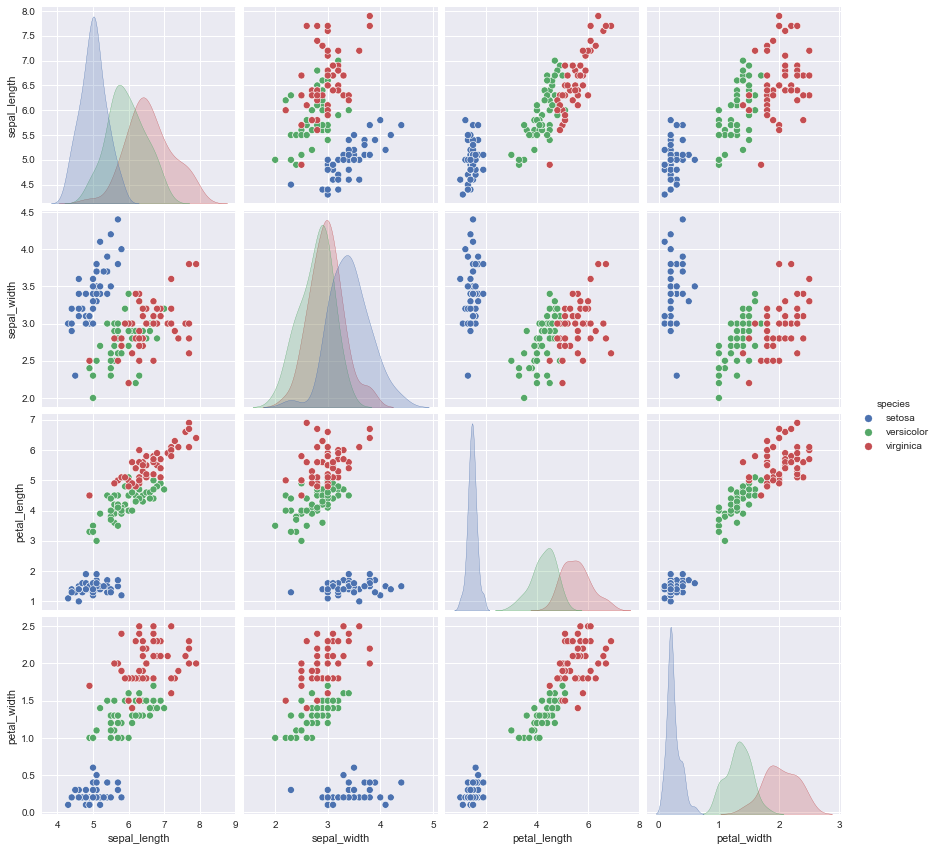

In [14]:
plt.close()
sns.pairplot(iris_df, hue='species', height=3)
plt.show()

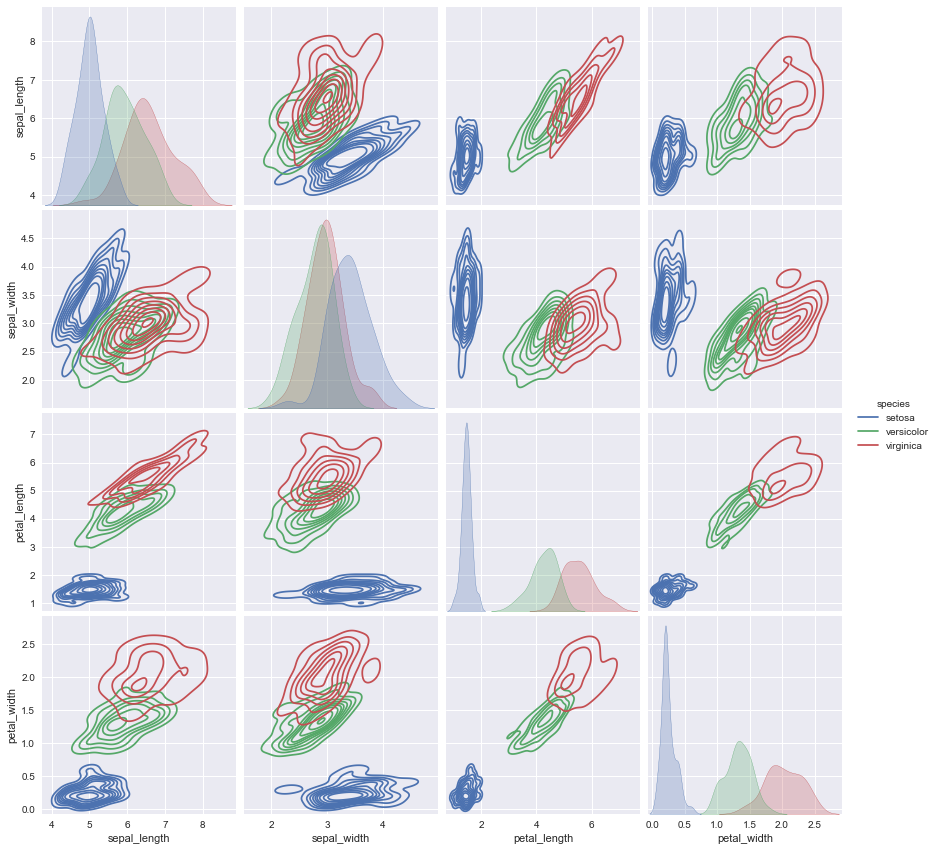

In [15]:
plt.close()
sns.pairplot(iris_df, hue='species', height=3, kind='kde')
plt.show()

### Conclusion

* `petal_length` and `petal_width` are highly used features for this data.
* From the above plot, it is observed that there is a overlap between `versicolor` and `virginica` whereas `setosa` flowers can easily classified.
* With the help of simple `if-else` conditions we can build a basic classifier to classify the class distributions.

### Histogram - `petal_length`

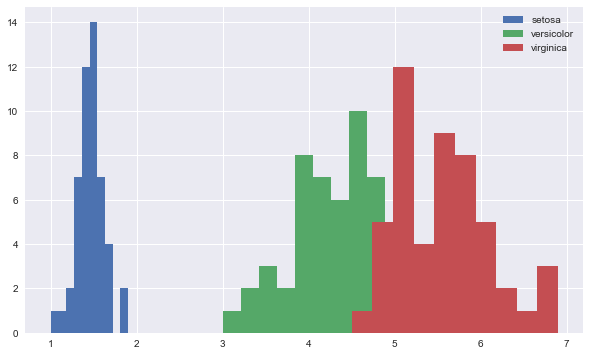

In [16]:
plt.figure(figsize=(10, 6))
for i in [setosa_df, versicolor_df, virginica_df]:
    plt.hist(i['petal_length'], label=i['species'].iloc[0])
plt.legend()
plt.show()

### Density and Histogram together

* The continuous curve is `PDF` (Probability Density Function) basically to show how dense or compactedness the regions is with the points.
* Histogram and PDF's are widely used for univariate analysis.
* The farther the class distributions are, the more well separated or classification can be achieved.

* CDF → Cummulative Distribution Function tells - what percentage of the values lie corresponding to its PDF.

    - The range of CDF is 0 to 1.
    - Basically the prabablities lie within these ranges.

`petal_length`

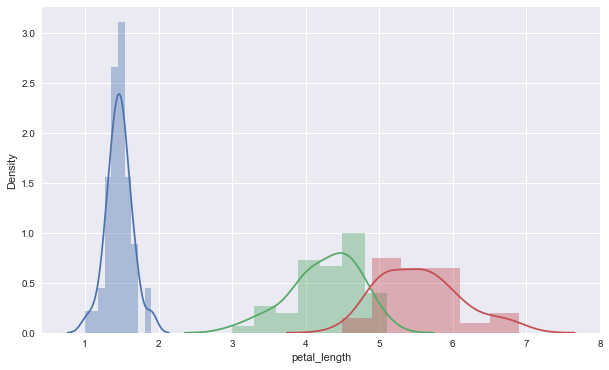

In [17]:
plt.figure(figsize=(10, 6))
for i in [setosa_df, versicolor_df, virginica_df]:
    sns.distplot(i['petal_length'], hist=True, kde=True,)
plt.show()

`petal_width`

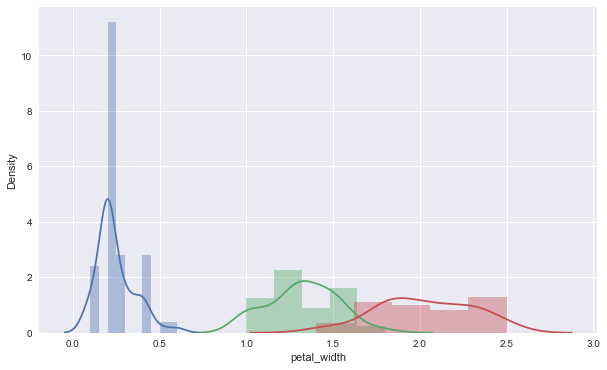

In [18]:
plt.figure(figsize=(10, 6))
for i in [setosa_df, versicolor_df, virginica_df]:
    sns.distplot(i['petal_width'], hist=True, kde=True)
plt.show()

`sepal_length`

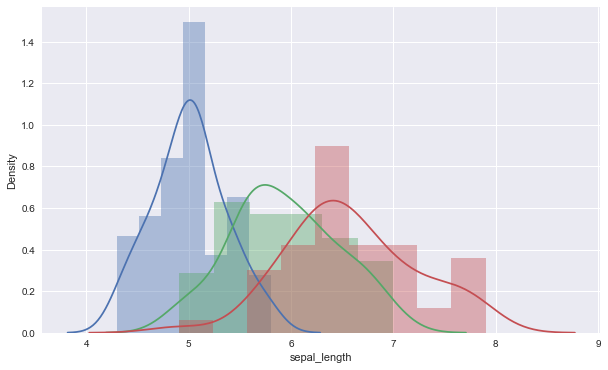

In [19]:
plt.figure(figsize=(10, 6))
for i in [setosa_df, versicolor_df, virginica_df]:
    sns.distplot(i['sepal_length'], hist=True, kde=True)
plt.show()

`sepal_width`

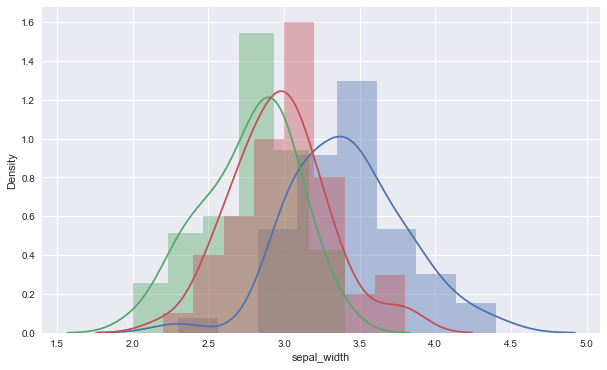

In [20]:
plt.figure(figsize=(10, 6))
for i in [setosa_df, versicolor_df, virginica_df]:
    sns.distplot(i['sepal_width'], hist=True, kde=True)
plt.show()

### Plot the `PDF` & `CDF`

In [21]:
def graph_pdf_cdf(data, col_name, bins=10, density=True):
    counts, bin_edges = np.histogram(a=data[col_name], bins=10, density=True)
    # print(counts) - 10
    # print(bin_edges) - 11

    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)

    plt.figure(figsize=(10, 6))
    plt.title('PDF & CDF for {}'.format(col_name))
    plt.plot(bin_edges[1:], pdf, label='pdf')
    plt.plot(bin_edges[1:], cdf, label='cdf')
    plt.legend()
    plt.show()
    
    return True

`setosa_df['petal_length']`

In [22]:
# graph_pdf_cdf(data=setosa_df, col_name='petal_length')

`versicolor_df['petal_length']`

In [23]:
# graph_pdf_cdf(data=versicolor_df, col_name='petal_length')

`virginica_df['petal_length']`

In [24]:
# graph_pdf_cdf(data=virginica_df, col_name='petal_length')

Altogether (plots - `pdf` & `cdf`)

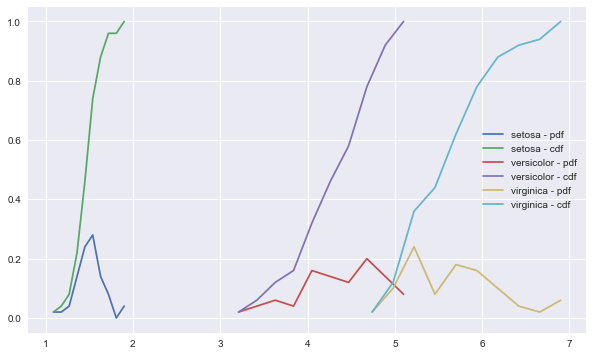

In [25]:
plt.figure(figsize=(10, 6))

for i in [setosa_df, versicolor_df, virginica_df]:
    counts, bin_edges = np.histogram(a=i['petal_length'], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    
    plt.plot(bin_edges[1:], pdf, label='{} - pdf'.format(i['species'].iloc[0]))
    plt.plot(bin_edges[1:], cdf, label='{} - cdf'.format(i['species'].iloc[0]))
    
plt.legend()
plt.show()

### Means' do reflect by an outlier

* refer to my notes

In [26]:
s_mean = np.mean(setosa_df['petal_length'])
ver_mean = np.mean(versicolor_df['petal_length'])
vir_mean = np.mean(virginica_df['petal_length'])

print(s_mean)
print(ver_mean)
print(vir_mean)

1.464
4.26
5.5520000000000005


### Medians' do not reflect by an outlier

* refer to my notes

In [27]:
s_median = np.median(setosa_df['petal_length'])
ver_median = np.median(versicolor_df['petal_length'])
vir_median = np.median(virginica_df['petal_length'])

print(s_median)
print(ver_median)
print(vir_median)

1.5
4.35
5.55


### Percentiles

In [28]:
def compute_percentile(p, data):
    """
    Formula          → l_p = ((n - 1) * (p / 100)) + 1
    percentile_value → data[int(l_p) - 1] + (l_p - int(l_p)) * (data[int(l_p)] - data[int(l_p) - 1])
    
    :param p   : percentile value
    :param data: data to which the percentile is calculated
    """
    data = sorted(data)
    
    if (p == 100):
        return data[-1]
    
    l_p = (len(data) - 1) * (p / 100) + 1
    
    int_l_p = int(l_p)
    fl_l_p = l_p - int_l_p
    
    val1 = data[int_l_p - 1]
    val2 = data[int_l_p]    
    pval = val1 + (fl_l_p * (val2 - val1))
    
    return round(pval, 2)

In [29]:
print('--------------')
for d in ['setosa_df', 'versicolor_df', 'virginica_df']:
    print(d[:-3])
    data = eval(d)['petal_length'].to_list()
    for i in [0, 25, 75, 100]:
        perc = compute_percentile(p=i, data=data)
        print('\t{} \t→ {}'.format(i, perc))
    print('--------------')

--------------
setosa
	0 	→ 1.0
	25 	→ 1.4
	75 	→ 1.58
	100 	→ 1.9
--------------
versicolor
	0 	→ 3.0
	25 	→ 4.0
	75 	→ 4.6
	100 	→ 5.1
--------------
virginica
	0 	→ 4.5
	25 	→ 5.1
	75 	→ 5.88
	100 	→ 6.9
--------------


### Median Absolute Deviation

* refer to my notes

In [30]:
def get_median(data):
    data = sorted(data)
    inx = len(data) // 2
    
    if (len(data) % 2 == 0):
        inx_l = inx - 1
        median = (data[inx] + data[inx_l]) / 2
    else:
        median = data[inx]
    
    return median

def compute_mad(data, c=0.6745):
    med = get_median(data)
    abs_std = [abs(i - med) for i in data]
    mad = get_median(data=abs_std) / c
    return round(mad, 2)

In [31]:
for d in ['setosa_df', 'versicolor_df', 'virginica_df']:
    data = eval(d)['petal_length'].to_list()
    mad = compute_mad(data=data)
    print('{} → {}'.format(d[:-3], mad))

setosa → 0.15
versicolor → 0.52
virginica → 0.67


### Box plot

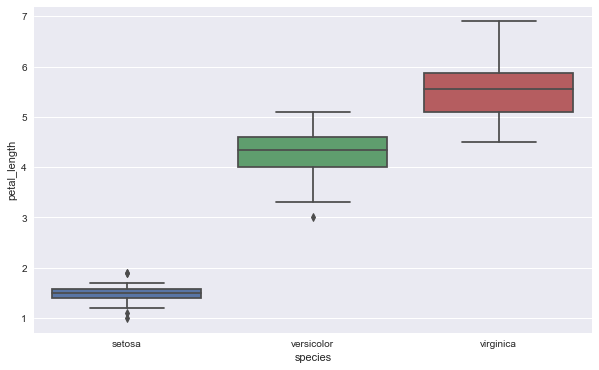

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species',y='petal_length', data=iris_df)
plt.show()

### Violin plot

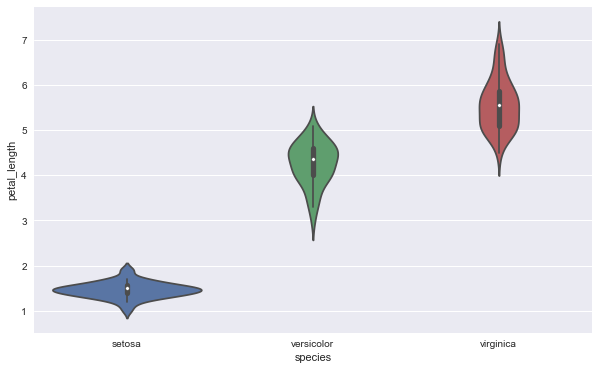

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species',y='petal_length', data=iris_df)
plt.show()

### Contour plot

* included for whole `iris_df`

<Figure size 720x432 with 0 Axes>

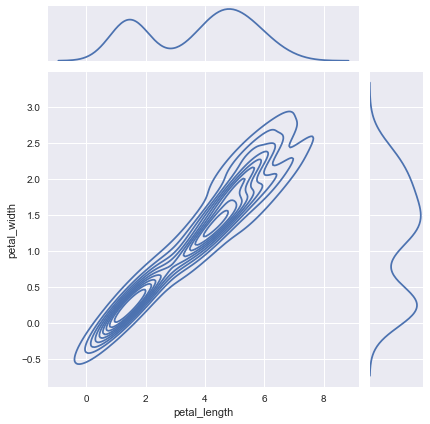

In [34]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='petal_length', y='petal_width', data=iris_df, kind='kde')
plt.show()

# End